# Requirements

In [ ]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the primary objective is to use Long Short-Term Memory (LSTM) networks for time series forecasting in order to predict the future **count of page loads**. To accomplish this use data from the past three days, which includes information such as the **count of page loads**, **count of unique visits**, **count of first time-visits**, and **count of returning visits**. The goal is to employ LSTM, a type of recurrent neural network, to effectively forecast the future **count of page loads** based on the provided historical data.

## The Website Visitors Dataset

## Downloading the Website Visitors Dataset

In [1]:
!gdown 1h1P3NboXKbWNngqgCB1i4bHFRcv7uDJe

Downloading...
From: https://drive.google.com/uc?id=1h1P3NboXKbWNngqgCB1i4bHFRcv7uDJe
To: /content/website-visitors.csv
100% 92.8k/92.8k [00:00<00:00, 74.7MB/s]


## Exploring the Website Visitors Dataset
This datatset consists of daily counts of page loads, unique visitors, first-time visitors, and returning visitors for an academic teaching notes website. The dataset contains 2167 rows spanning from September 14, 2014, to August 19, 2020. A visit is defined as a series of hits on one or more pages by the same user on a given day, identified by IP address. Shared IP addresses are considered a single user. A visit is "unique" if a hit from the same IP address hasn't occurred within the last 6 hours. Returning visitors are identified by cookies, and the rest are classified as first-time visitors. The unique visitor count is the sum of returning and first-time visitors.

The dataset consists of the following columns:
- date - date in mm/dd/yyyy format,
- day_of_week - day of the week in text form (Monday, Tuesday, etc.),
- page_loads - daily number of pages loaded,
- unique_visits - daily number of visitors from IP addresses with no hits in over 6 hours,
- first_time_visits - number of unique visitors without a identifying cookie, and
- returning_visits - number of unique visitors minus first-time visitors.

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [2]:
# Write your code here. Add as many boxes as you need.
import pandas as pd
df=pd.read_csv('/content/website-visitors.csv')

Explore the dataset using visualizations of your choice.

array([[<Axes: title={'center': 'page_loads'}>,
        <Axes: title={'center': 'unique_visits'}>],
       [<Axes: title={'center': 'first_time_visits'}>,
        <Axes: title={'center': 'returning_visits'}>]], dtype=object)

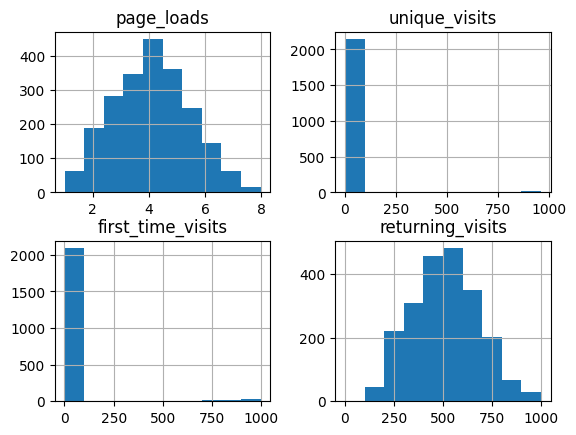

In [3]:
# Write your code here. Add as many boxes as you need.
df.hist()

Drop the column **day_of_week**, because we won't use it.

In [4]:
# Write your code here. Add as many boxes as you need.
df=df.drop(columns='day_of_week')

In [5]:
df = df.set_index('date')

In [6]:
df = df.sort_index()
df.head()

,page_loads,unique_visits,first_time_visits,returning_visits
date,,,,
1/1/2015,1.265,876.000,715.0,161.0
1/1/2016,1.411,960.000,786.0,174.0
1/1/2017,1.447,1.039,832.0,207.0
1/1/2018,1.709,1.120,878.0,242.0
1/1/2019,1.715,1.168,891.0,277.0


## Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

*Be careful when extracting the features. For each day, ensure that features are obtained sequentially, starting with those from 3 days ago, followed by features from 2 days ago, and finally, features from 1 day ago. This becomes crucial when reshaping the train and test sets later on.*

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [7]:
lag=3


In [8]:
data=df

In [17]:
columns = ['page_loads', 'unique_visits', 'first_time_visits', 'returning_visits']

In [18]:
for i in range(3,0,-1):
  for col in columns:
    data[f'{col}_prev_{i}'] = data[col].shift(i)

In [19]:
data.head()

,page_loads,unique_visits,first_time_visits,returning_visits,page_loads_prev_3,unique_visits_prev_3,first_time_visits_prev_3,returning_visits_prev_3,page_loads_prev_2,unique_visits_prev_2,first_time_visits_prev_2,returning_visits_prev_2,page_loads_prev_1,unique_visits_prev_1,first_time_visits_prev_1,returning_visits_prev_1
date,,,,,,,,,,,,,,,,
1/1/2015,1.265,876.000,715.0,161.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/1/2016,1.411,960.000,786.0,174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.265,876.000,715.0,161.0
1/1/2017,1.447,1.039,832.0,207.0,NaN,NaN,NaN,NaN,1.265,876.000,715.0,161.0,1.411,960.000,786.0,174.0
1/1/2018,1.709,1.120,878.0,242.0,1.265,876.0,715.0,161.0,1.411,960.000,786.0,174.0,1.447,1.039,832.0,207.0
1/1/2019,1.715,1.168,891.0,277.0,1.411,960.0,786.0,174.0,1.447,1.039,832.0,207.0,1.709,1.120,878.0,242.0


In [20]:
data = data.dropna(axis=0)

In [21]:
data2=data

In [22]:
data=data.drop(columns=['unique_visits', 'first_time_visits', 'returning_visits'])

In [24]:
data.head()

,page_loads,page_loads_prev_3,unique_visits_prev_3,first_time_visits_prev_3,returning_visits_prev_3,page_loads_prev_2,unique_visits_prev_2,first_time_visits_prev_2,returning_visits_prev_2,page_loads_prev_1,unique_visits_prev_1,first_time_visits_prev_1,returning_visits_prev_1
date,,,,,,,,,,,,,
1/1/2018,1.709,1.265,876.000,715.0,161.0,1.411,960.000,786.0,174.0,1.447,1.039,832.000,207.0
1/1/2019,1.715,1.411,960.000,786.0,174.0,1.447,1.039,832.0,207.0,1.709,1.120,878.000,242.0
1/1/2020,1.554,1.447,1.039,832.0,207.0,1.709,1.120,878.0,242.0,1.715,1.168,891.000,277.0
1/10/2015,1.952,1.709,1.120,878.0,242.0,1.715,1.168,891.0,277.0,1.554,1.105,870.000,235.0
1/10/2016,2.814,1.715,1.168,891.0,277.0,1.554,1.105,870.0,235.0,1.952,1.240,1.066,174.0


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [68]:
# Write your code here. Add as many boxes as you need.
selected_columns = [
    'page_loads_prev_3', 'unique_visits_prev_3', 'first_time_visits_prev_3', 'returning_visits_prev_3',
    'page_loads_prev_2', 'unique_visits_prev_2', 'first_time_visits_prev_2', 'returning_visits_prev_2',
    'page_loads_prev_1', 'unique_visits_prev_1', 'first_time_visits_prev_1', 'returning_visits_prev_1'
]

X, Y = data[selected_columns], data['page_loads']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

## Feauture Scaling
Scale the extracted features using an appropriate scaler.

In [70]:
# Write your code here. Add as many boxes as you need.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
Y_train = scaler.fit_transform(Y_train.values.reshape(-1, 1))

## Feature Reshaping

Reshape the feature dimensions into the shape `(samples, timesteps, features)`.

In [71]:
# Write your code here. Add as many boxes as you need.
X_train = X_train.reshape(X_train.shape[0], lag, X_train.shape[1] // lag)
X_test = X_test.reshape(X_test.shape[0], lag, X_test.shape[1] // lag)

In [72]:
X_train.shape

(1731, 3, 4)

## Long Short-Term Memory (LSTM) Network
Build a Long Short-Term Memory (LSTM) Network for forecasting the future **count of page loads** based on the extracted features from the previous three days.

Define the forecasting model using the **Keras Sequential API** (`keras.models.Sequential`), incorporating one or more LSTM layers along with additional relevant layers (`keras.layers`). Be cautious when specifying the configuration of the final layer to ensure proper model output for the forecasting task.

In [73]:
# Write your code here. Add as many boxes as you need.
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import keras
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = Sequential()
model.add(LSTM(100,  activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(50,  activation='relu'))
model.add(Dense(1, activation='linear'))

Compile the previously defined model specifying **loss function** (`keras.losses`), **optimizer** (`keras.optimizers`) and **evaluation metrics** (`keras.metics`).

In [74]:
# Write your code here. Add as many boxes as you need.
model.compile(loss=keras.losses.MeanSquaredError() , optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError() ])

Train the model on the training set, specifying the **batch size** and **number of epochs** for the training process. Allocate 20% of the samples for **validation**, and ensure that the dataset remains **unshuffled** during training.

In [75]:
# Write your code here. Add as many boxes as you need.
history = model.fit(X_train, Y_train, validation_split=0.2, batch_size=16, epochs=10,  shuffle=False)

Epoch 1/10
87/87 [==============================] - 5s 17ms/step - loss: 0.0734 - mean_squared_error: 0.0734 - mean_absolute_error: 0.2269 - val_loss: 0.0352 - val_mean_squared_error: 0.0352 - val_mean_absolute_error: 0.1517
Epoch 2/10
87/87 [==============================] - 1s 13ms/step - loss: 0.0401 - mean_squared_error: 0.0401 - mean_absolute_error: 0.1686 - val_loss: 0.0370 - val_mean_squared_error: 0.0370 - val_mean_absolute_error: 0.1540
Epoch 3/10
87/87 [==============================] - 1s 13ms/step - loss: 0.0387 - mean_squared_error: 0.0387 - mean_absolute_error: 0.1647 - val_loss: 0.0393 - val_mean_squared_error: 0.0393 - val_mean_absolute_error: 0.1591
Epoch 4/10
87/87 [==============================] - 1s 13ms/step - loss: 0.0377 - mean_squared_error: 0.0377 - mean_absolute_error: 0.1614 - val_loss: 0.0420 - val_mean_squared_error: 0.0420 - val_mean_absolute_error: 0.1655
Epoch 5/10
87/87 [==============================] - 1s 13ms/step - loss: 0.0372 - mean_squared_error

Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

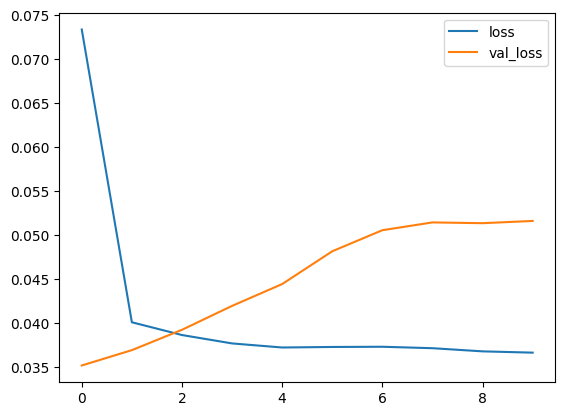

In [76]:
# Write your code here. Add as many boxes as you need.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

Use the trained model to make predictions for the test set.

In [77]:
# Write your code here. Add as many boxes as you need.
preds = model.predict(X_test)

14/14 [==============================] - 0s 5ms/step


In [78]:
preds = scaler.inverse_transform(preds)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [79]:
# Write your code here. Add as many boxes as you need.
mean_squared_error(preds, Y_test), mean_absolute_error(preds, Y_test), r2_score(preds, Y_test)

(3.1061398655083248, 1.4626619766138445, -9.190041033619064)

Create a line plot in order to compare the actual and predicted mean temperatures for the test set.

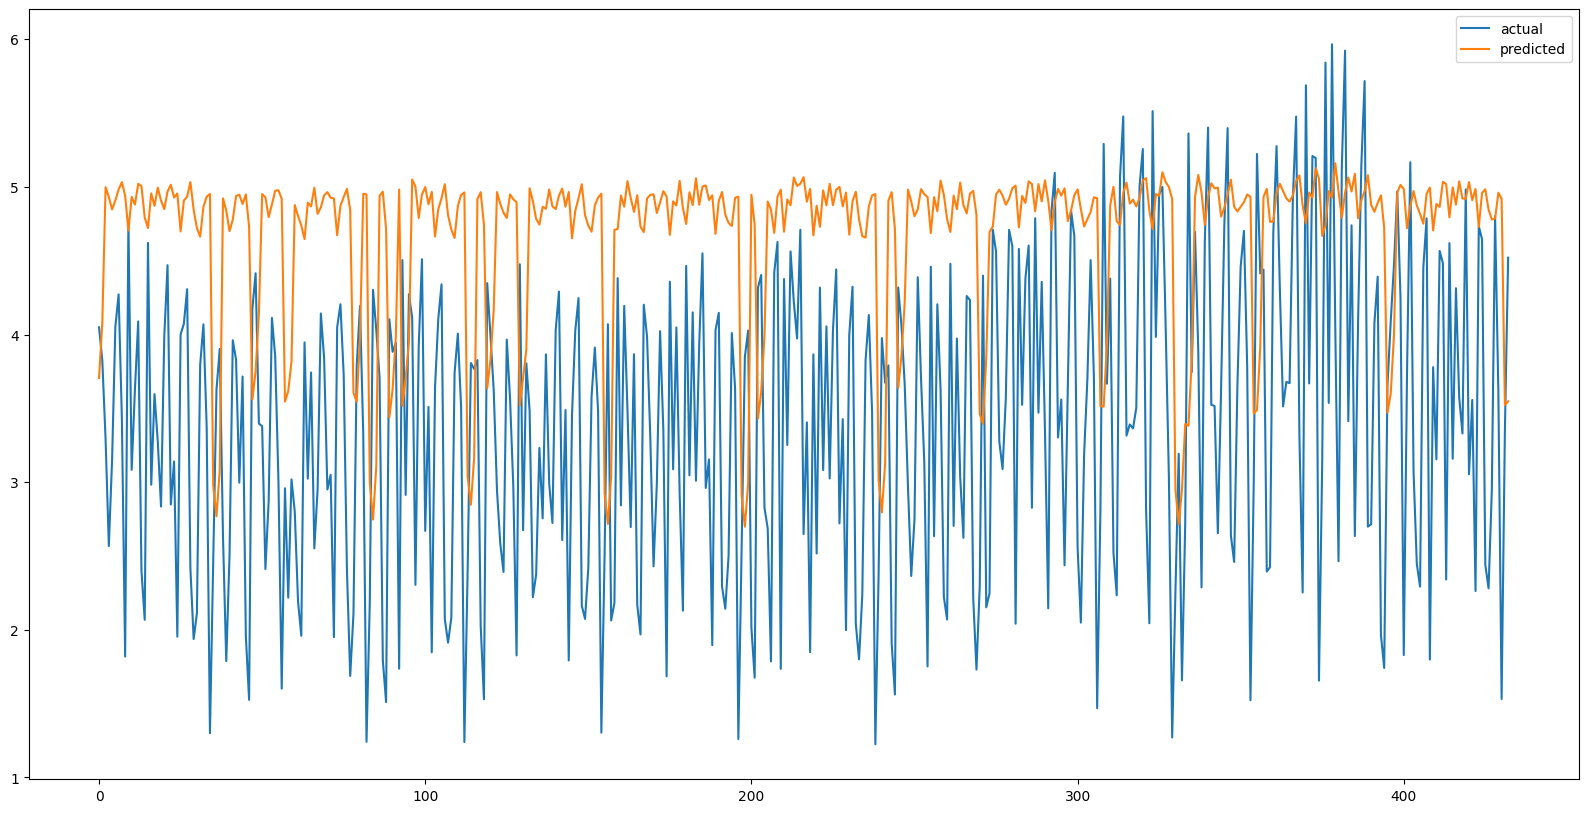

In [80]:
# Write your code here. Add as many boxes as you need.
plt.figure(figsize=(20, 10))
plt.plot(Y_test.values, label='actual')
plt.plot(preds, label='predicted')
plt.legend()
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to perform a sentiment analysis on a dataset consisting of wine reviews. The dataset contains two attributes: **description** and **points**. The description is a brief text describing the wine and the points which represents a quality metric ranging from 1 to 100. If some wine has at least 90 points it is considered **exceptional**. Your task involves predicting if some wine is exceptional based on its review.

The greater part of the code for the solution is already given. You need to define a tokenizer to tokenize the given texts and a deep neural network model that will be used for the classification task at hand. Fill in only the missing code blocks.

## Requirements

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
import keras
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Downloading the Wine Reviews Dataset

In [45]:
!gdown 1fz9449M9Owofy6CYrKzkGwXKesI32B8u

Downloading...
From: https://drive.google.com/uc?id=1fz9449M9Owofy6CYrKzkGwXKesI32B8u
To: /content/wine-reviews.csv
100% 32.5M/32.5M [00:00<00:00, 188MB/s]


## Exploring the Climate Dataset

Load the dataset into a `pandas` data frame.

In [46]:
df = pd.read_csv('wine-reviews.csv')

In [47]:
df.head()

,description,points
0,"Aromas include tropical fruit, broom, brimston...",87
1,"This is ripe and fruity, a wine that is smooth...",87
2,"Tart and snappy, the flavors of lime flesh and...",87
3,"Pineapple rind, lemon pith and orange blossom ...",87
4,"Much like the regular bottling from 2012, this...",87


## Feature Extraction

Extract the feature `exceptional` for each wine review.

In [48]:
df['exceptional'] = df['points'].apply(lambda elem: 1 if elem >= 90 else 0)

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [49]:
X, y = df['description'], df['exceptional']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Text Tokenization

Use tokenizer to convert raw text into a sequence of tokens.

In [51]:
# Write your code here. Add as many boxes as you need.
max_tokens = 64

In [52]:
tokenizer = Tokenizer(num_words=max_tokens)
tokenizer.fit_on_texts(X_train.values)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [53]:
len_tokens = [len(token_list) for token_list in X_train]

In [54]:
X_train

[[6, 63, 8, 56, 1, 12, 1, 14, 2, 16, 35, 27, 49, 9, 10, 1, 2, 58, 11],
 [6, 7, 10, 32, 1, 12, 1, 3, 1, 26, 11, 44, 63, 12, 7, 51, 1, 11, 2, 58, 1],
 [15, 4, 1, 5, 13, 1, 14, 2, 63, 16, 3, 4, 27, 1, 39, 18, 2, 40, 9],
 [5, 6, 31, 5, 15, 4, 39, 46, 1, 2, 16, 57, 26, 25, 1, 3, 4, 47, 22],
 [3, 8, 1, 24, 17, 3, 54, 41, 53, 36, 18, 7, 1, 3, 11, 2, 61, 1, 9],
 [6, 7, 3, 1, 8, 2, 1, 2, 10, 5, 36, 4, 26, 1, 26, 25, 44, 63, 24, 1],
 [6, 62, 2, 4, 13, 17, 12, 7, 47, 2, 4, 5, 2, 1, 6, 7, 11, 23, 45],
 [10, 3, 27, 13, 53, 1, 3, 50, 40, 58, 54, 1, 5, 9, 5, 17, 14, 2, 19],
 [6, 29, 4, 46, 1, 38, 2, 16, 1, 26, 25, 9, 32, 4, 6, 7, 47, 1, 1, 2, 16, 7],
 [32, 1, 15, 4, 1, 2, 4, 6, 2, 8, 7, 1, 5, 3, 22],
 [27, 1, 5, 9, 4, 1, 24, 4],
 [6, 8, 2, 1, 4, 2, 4, 2, 10, 15, 4, 5, 24, 5, 1, 25, 9],
 [6,
  7,
  3,
  39,
  8,
  5,
  18,
  1,
  31,
  48,
  28,
  22,
  21,
  2,
  54,
  1,
  2,
  33,
  17,
  20,
  2,
  2,
  8,
  7,
  1,
  11,
  23,
  20],
 [4,
  1,
  14,
  2,
  42,
  4,
  6,
  8,
  11,
  3,
  16,
  32

## Padding
Pad each sequence to maximum length of 16.

In [55]:
# Write your code here. Add as many boxes as you need.
maxlen=16

In [56]:
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [57]:
X_train.shape, X_test.shape

((103976, 16), (25995, 16))

## Deep Neural Network

Define Deep Neural Network model to predict if a specific wine is exceptional or not based on the tokenized and padded wine reviews.

In [58]:
# Write your code here. Add as many boxes as you need.
model = Sequential()
model.add(Embedding(max_tokens, 32, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Compile the previously defined model specifying loss function, optimizer and evaluation metrics.

In [59]:
# Write your code here. Add as many boxes as you need.
model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

Fit the compiled model on the train set specifying the percent for validation, batch_size, and number of epochs.

In [60]:
# Write your code here. Add as many boxes as you need.
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=64, epochs=10)

Epoch 1/10
1300/1300 [==============================] - 40s 25ms/step - loss: 0.5957 - precision: 0.6032 - recall: 0.3932 - val_loss: 0.5872 - val_precision: 0.5636 - val_recall: 0.6693
Epoch 2/10
1300/1300 [==============================] - 29s 22ms/step - loss: 0.5721 - precision: 0.6293 - recall: 0.4907 - val_loss: 0.5642 - val_precision: 0.6421 - val_recall: 0.4533
Epoch 3/10
1300/1300 [==============================] - 31s 24ms/step - loss: 0.5634 - precision: 0.6358 - recall: 0.5085 - val_loss: 0.5605 - val_precision: 0.6329 - val_recall: 0.5276
Epoch 4/10
1300/1300 [==============================] - 29s 22ms/step - loss: 0.5574 - precision: 0.6395 - recall: 0.5186 - val_loss: 0.5634 - val_precision: 0.6119 - val_recall: 0.5977
Epoch 5/10
1300/1300 [==============================] - 30s 23ms/step - loss: 0.5523 - precision: 0.6445 - recall: 0.5315 - val_loss: 0.5580 - val_precision: 0.6483 - val_recall: 0.4691
Epoch 6/10
1300/1300 [==============================] - 29s 22ms/step 

Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

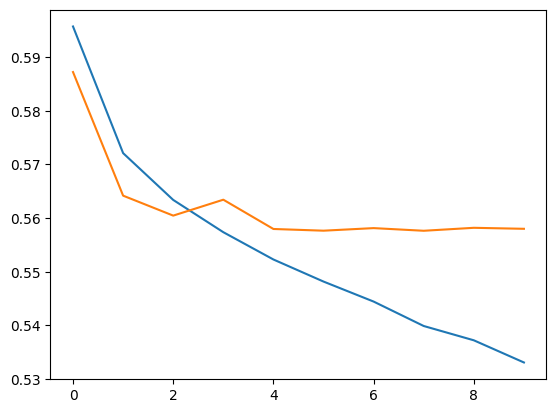

In [61]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.show()

Use the trained model to make predictions for the test set.

In [62]:
y_pred = model.predict(X_test)

813/813 [==============================] - 3s 3ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [63]:
print(classification_report(y_test, np.round(y_pred)))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78     16177
           1       0.65      0.51      0.57      9818

    accuracy                           0.71     25995
   macro avg       0.69      0.67      0.68     25995
weighted avg       0.71      0.71      0.70     25995

